In [78]:
import requests
from bs4 import BeautifulSoup
import unidecode

In [79]:
songName = "Sol Loiro"
artistName = "Armandinho"

In [80]:
baseUrl = "https://www.vagalume.com.br/"
r = requests.get(baseUrl + artistName.lower())

In [92]:
soup = BeautifulSoup(unidecode.unidecode(r.content.decode('utf-8', 'ignore')), 'html.parser')

In [89]:
print(soup.prettify())

<!DOCTYPE doctype html>
<html lang="pt" xmlns="http://www.w3.org/1999/xhtml">
 <meta charset="utf-8"/>
 <meta content="pt-br" name="language"/>
 <meta content="initial-scale=1,maximum-scale=1,user-scalable=no,width=device-width" name="viewport"/>
 <title>
  Armandinho - VAGALUME
 </title>
 <link href="https://www.vagalume.com.br/armandinho/" rel="canonical"/>
 <link as="font" crossorigin="anonymous" href="https://fonts.gstatic.com/s/rubik/v6/_mlO9_1N7oXYhEnEzC2l-g.woff2" rel="preload" type="font/woff2"/>
 <link as="font" crossorigin="anonymous" href="https://fonts.gstatic.com/s/rubik/v6/IUSlgBbgyuDQpy87mBOAc_esZW2xOQ-xsNqO47m55DA.woff2" rel="preload" type="font/woff2"/>
 <link as="font" crossorigin="anonymous" href="https://fonts.gstatic.com/s/rubik/v6/0hS39AKxpJlEXQF3mVPgrvesZW2xOQ-xsNqO47m55DA.woff2" rel="preload" type="font/woff2"/>
 <link as="font" crossorigin="anonymous" href="/fonts/icons/vagaIcons-geral.woff" rel="preload" type="font/woff2"/>
 <link as="image" crossorigin="" hre

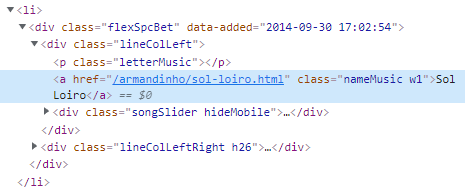

O nome da música está dentro de um elemento `<a>` dentro de um `<li>`, e o link para a página com a letra da música está no `href` desse `<a>`

In [29]:
soup.find_all("a")                                                    # pega todos os a
soup.find("a", text=songName, attrs={"class": "nameMusic"})           # pega o primeiro os a com texto = songName
soup.find("a", text=songName, attrs={"class": "nameMusic"})['href']   # pega o caminho relativo

'/armandinho/sol-loiro.html'

In [30]:
# Função que, a partir no nome do artista e nome da música, retorna a URL da música

def songUrl(artistName, songName):
    
    baseUrl = "https://www.vagalume.com.br"
    r = requests.get(baseUrl + "/" + artistName.lower())
    
    soup = BeautifulSoup(r.text, 'html.parser')
    
    relativePath = soup.find("a", text=songName, attrs={"class": "nameMusic"})['href']
    
    url = baseUrl + relativePath
    
    return url

In [31]:
# aqui simplemente pega uma lista de nomes e retorna o link pra letra

songs = ['Sol Loiro', 'Ursinho de Dormir', "I Can't Say"]

urls = []

for song in songs:
    urls.append(songUrl(artistName, song))
    
urls

['https://www.vagalume.com.br/armandinho/sol-loiro.html',
 'https://www.vagalume.com.br/armandinho/ursinho-de-dormir.html',
 'https://www.vagalume.com.br/armandinho/i-cant-say.html']

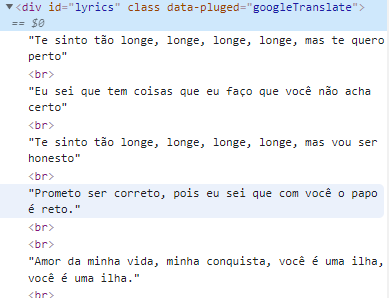

Letra está dentro de uma `<div>` com `id` "lyrics"

In [52]:
# leitura da página novamente
url = urls[0]
r = requests.get(url)

soup = BeautifulSoup(r.content.decode('utf-8', 'ignore'), 'html.parser')

In [53]:
soup.find("div", attrs={"id": "lyrics"} )

<div data-plugin="googleTranslate" id="lyrics">Te sinto tão longe, longe, longe, longe, mas te quero perto<br/>Eu sei que tem coisas que eu faço que você não acha certo<br/>Te sinto tão longe, longe, longe, longe, mas vou ser honesto<br/>Prometo ser correto, pois eu sei que com você o papo é reto.<br/><br/>Amor da minha vida, minha conquista, você é uma ilha, você é uma ilha.<br/>Onde as ondas quebram perto, desse mar azul eterno<br/>Teu sol loiro me ilumina, você é minha mina.<br/><br/>Te sinto tão longe, longe, longe, longe, mas te quero perto<br/>Eu sei que tem coisas que eu faço que você não acha certo<br/>Te sinto tão longe, longe, longe, longe, mas vou ser honesto<br/>Prometo ser correto pois eu sei que com você o papo é reto.<br/><br/>Amor da minha vida, minha conquista, você é uma ilha, você é uma ilha.<br/>Onde as ondas quebram perto, desse mar azul eterno<br/>Teu sol loiro me ilumina, você é minha mina.<br/><br/>Te sinto tão longe, longe, longe, longe, mas te quero perto<br/>

In [55]:
soup.find("div", attrs={"id": "lyrics"} ).get_text(" ")

'Te sinto tão longe, longe, longe, longe, mas te quero perto Eu sei que tem coisas que eu faço que você não acha certo Te sinto tão longe, longe, longe, longe, mas vou ser honesto Prometo ser correto, pois eu sei que com você o papo é reto. Amor da minha vida, minha conquista, você é uma ilha, você é uma ilha. Onde as ondas quebram perto, desse mar azul eterno Teu sol loiro me ilumina, você é minha mina. Te sinto tão longe, longe, longe, longe, mas te quero perto Eu sei que tem coisas que eu faço que você não acha certo Te sinto tão longe, longe, longe, longe, mas vou ser honesto Prometo ser correto pois eu sei que com você o papo é reto. Amor da minha vida, minha conquista, você é uma ilha, você é uma ilha. Onde as ondas quebram perto, desse mar azul eterno Teu sol loiro me ilumina, você é minha mina. Te sinto tão longe, longe, longe, longe, mas te quero perto Eu sei que tem coisas que eu faço que você não acha certo Te sinto tão longe, longe, longe, longe, mas vou ser honesto Prometo

# Daqui pra baixo ta com código bonitinho

In [56]:
import requests
from bs4 import BeautifulSoup

In [64]:
# função para pegar HTML do artista, a partir do nome

def getArtistHTML(artistName):
    
    baseUrl = "https://www.vagalume.com.br"
    
    name = artistName.replace(" ", "-").lower()    # troca espaço por - no nome e deixa minúsculo
    
    artistUrl = baseUrl + "/" + name
    r = requests.get(artistUrl)
    
    artistHTML = BeautifulSoup(r.text, 'html.parser')
    
    return artistHTML

In [67]:
# função para pegar letra a partir do artista e do nome da música

def getLyrics(artistName, songName):
    
    baseUrl = "https://www.vagalume.com.br"
    
    artistHTML = getArtistHTML(artistName)                                                   # primeiro, pegar o html do artista
    
    relativePath = artistHTML.find("a", text=songName, attrs={"class": "nameMusic"})['href']
    
    songUrl = baseUrl + relativePath                                                         # pegar a URL da música
    
    r = requests.get(songUrl)                                                                # acessar a URL da música
    songHTML = BeautifulSoup(r.content.decode('utf-8', 'ignore'), 'html.parser')
    
    letra = songHTML.find("div", attrs={"id": "lyrics"} ).get_text(" ")                      # letra da música
    
    return letra
    

In [70]:
artista = "Armandinho"
musica = "Ursinho de Dormir"
getLyrics(artista, musica)

'E hoje eu descobri O quanto eu te quero Ursinho de dormir Vem que eu te espero assim E eu hei de conquistar Teu coração durão demais Que não quis pagar pra ver Nem dar o braço a torcer Eu vou te levar pro mar Nas pedras eu vou te amar E ao ver o sol se pôr Eu vou te matar de amor Eu vou te levar pro céu Pra onde você quiser Eu tenho um beck pra depois Pra brindar o infinito de nós dois, de nós dois, de nós dois. E hoje eu descobri O quanto eu te quero Ursinho de dormir Vem que eu te espero assim E eu ei de conquistar Teu coração durão demais Que não quis pagar pra ver Nem dar o braço a torcer Eu vou te levar pro mar Nas pedras eu vou te amar E ao ver o sol se pôr Eu vou te matar de amor Eu vou te levar pro céu Pra onde você quiser Eu tenho um beck pra depois Pra brindar o infinito de nós dois, de nós dois, de nós dois. E eu vou te levar pro mar Nas pedras eu vou te amar E ao ver o sol se pôr Eu vou te matar de amor Eu vou te levar pro céu Pra onde você quiser Eu tenho um beck pra depo